In [1]:
import pandas as pd 
import numpy as np
import math
import tensorflow as tf
print(pd.__version__)

1.2.0


## Print Dependencies



Dependences are fundamental to record the computational environment.

In [2]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p pandas,keras,numpy,math,tensorflow,matplotlib,h5py

# date
print (" ")
%watermark -u -n -t -z

Python implementation: CPython
Python version       : 3.8.7
IPython version      : 7.18.1

pandas    : 1.2.0
keras     : 2.4.3
numpy     : 1.19.5
math      : unknown
tensorflow: 2.4.0
matplotlib: 3.3.3
h5py      : 2.10.0

Compiler    : Clang 12.0.0 (clang-1200.0.32.28)
OS          : Darwin
Release     : 20.2.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

 
Last updated: Tue Jan 26 2021 14:12:38CET



## Load of the data

In [31]:
from process import loaddata
regr_data = loaddata("../data/regression/100.csv")
class_data = loaddata("../data/classifier/100.csv")

In [32]:
np.random.shuffle(class_data)
y = class_data[:,0]
x = class_data[:,1:]

In [33]:
train_split = 0.75
train_limit = int(len(y)*train_split)
print("Training sample: {0} \nValuation sample: {1}".format(train_limit, len(y)-train_limit))

Training sample: 93048 
Valuation sample: 31016


In [34]:
x_train = x[:train_limit]
x_val = x[train_limit:]

y_train = y[:train_limit]
y_val = y[train_limit:]

## Model Build

In [35]:
from keras.models import Sequential
from keras.layers.core import Dense
import keras.backend as K
from keras import optimizers
from keras import models
from keras import layers

In [36]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (16, activation = "sigmoid" , input_shape = x.shape))
    model.add (layers.Dense (16, activation = "relu"))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics =["accuracy"])
    return model

In [37]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 20, batch_size = 100 , validation_data = (x_val, y_val) )
model.save("../models/classifier/no-dropout-100.h5")

Epoch 1/20
931/931 [==============================] - 1s 1ms/step - loss: 0.6666 - accuracy: 0.6131 - val_loss: 0.4738 - val_accuracy: 0.8082
Epoch 2/20
931/931 [==============================] - 1s 942us/step - loss: 0.4279 - accuracy: 0.8378 - val_loss: 0.3324 - val_accuracy: 0.8780
Epoch 3/20
931/931 [==============================] - 1s 1ms/step - loss: 0.3138 - accuracy: 0.8850 - val_loss: 0.2729 - val_accuracy: 0.9055
Epoch 4/20
931/931 [==============================] - 1s 1ms/step - loss: 0.2626 - accuracy: 0.9066 - val_loss: 0.2380 - val_accuracy: 0.9158
Epoch 5/20
931/931 [==============================] - 1s 990us/step - loss: 0.2280 - accuracy: 0.9218 - val_loss: 0.2123 - val_accuracy: 0.9258
Epoch 6/20
931/931 [==============================] - 1s 914us/step - loss: 0.2087 - accuracy: 0.9301 - val_loss: 0.2041 - val_accuracy: 0.9314
Epoch 7/20
931/931 [==============================] - 1s 1ms/step - loss: 0.1968 - accuracy: 0.9349 - val_loss: 0.1966 - val_accuracy: 0.9302


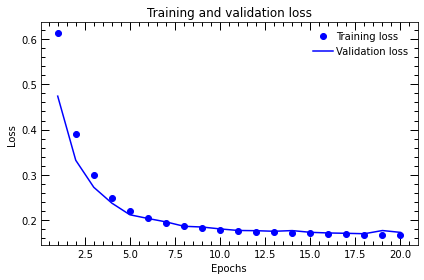

In [38]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

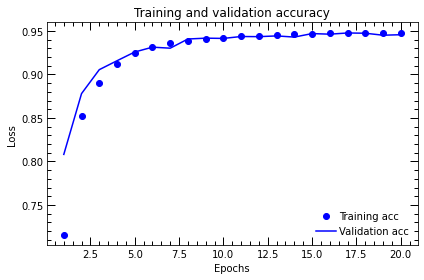

In [39]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [40]:
def build_model() :
    model = models.Sequential()
    model.add (layers.Dense (16 , activation = "relu" , input_shape = x.shape))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (16, activation = "relu"))
    model.add(layers.Dropout(0.2))
    model.add (layers.Dense (1 , activation = "sigmoid"))
    model.compile(optimizer = "adam" , loss = "binary_crossentropy" , metrics =["accuracy"])
    return model

In [41]:
model = build_model ()
history = model.fit ( x_train, y_train, epochs = 96, batch_size = 150 , validation_data = (x_val, y_val) )
model.save("../models/classifier/with-dropout-100.h5")

Epoch 1/96
621/621 [==============================] - 2s 2ms/step - loss: 0.6402 - accuracy: 0.6175 - val_loss: 0.3400 - val_accuracy: 0.8878
Epoch 2/96
621/621 [==============================] - 1s 1ms/step - loss: 0.3520 - accuracy: 0.8656 - val_loss: 0.2310 - val_accuracy: 0.9276
Epoch 3/96
621/621 [==============================] - 1s 1ms/step - loss: 0.2721 - accuracy: 0.9002 - val_loss: 0.1993 - val_accuracy: 0.9325
Epoch 4/96
621/621 [==============================] - 1s 1ms/step - loss: 0.2404 - accuracy: 0.9160 - val_loss: 0.1879 - val_accuracy: 0.9368
Epoch 5/96
621/621 [==============================] - 1s 1ms/step - loss: 0.2192 - accuracy: 0.9237 - val_loss: 0.1790 - val_accuracy: 0.9431
Epoch 6/96
621/621 [==============================] - 1s 1ms/step - loss: 0.2079 - accuracy: 0.9290 - val_loss: 0.1745 - val_accuracy: 0.9432
Epoch 7/96
621/621 [==============================] - 1s 1ms/step - loss: 0.1974 - accuracy: 0.9335 - val_loss: 0.1734 - val_accuracy: 0.9431
Epoch 

621/621 [==============================] - 1s 1ms/step - loss: 0.1709 - accuracy: 0.9448 - val_loss: 0.1516 - val_accuracy: 0.9534
Epoch 52/96
621/621 [==============================] - 1s 1ms/step - loss: 0.1680 - accuracy: 0.9463 - val_loss: 0.1677 - val_accuracy: 0.9464
Epoch 53/96
621/621 [==============================] - 1s 1ms/step - loss: 0.1720 - accuracy: 0.9435 - val_loss: 0.1552 - val_accuracy: 0.9513
Epoch 54/96
621/621 [==============================] - 1s 1ms/step - loss: 0.1670 - accuracy: 0.9462 - val_loss: 0.1574 - val_accuracy: 0.9503
Epoch 55/96
621/621 [==============================] - 1s 1ms/step - loss: 0.1670 - accuracy: 0.9466 - val_loss: 0.1561 - val_accuracy: 0.9504
Epoch 56/96
621/621 [==============================] - 1s 1ms/step - loss: 0.1672 - accuracy: 0.9465 - val_loss: 0.1552 - val_accuracy: 0.9514
Epoch 57/96
621/621 [==============================] - 1s 1ms/step - loss: 0.1707 - accuracy: 0.9443 - val_loss: 0.1568 - val_accuracy: 0.9511
Epoch 58/96

## Adding Dropout

Dropout is one of the most effective and most commonly used regularization techniques for neural networks, developed by Geoff Hinton and his students at the University of Toronto. Dropout, applied to a layer, consists of randomly dropping out (setting to zero) a number of output features of the layer during training. Let’s say a
given layer would normally return a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training. After applying dropout, this vector will have a few zero entries distributed at random: for example, [0, 0.5, 1.3, 0, 1.1]. The dropout rate is the fraction of the features that are zeroed out; it’s usually set between 0.2 and 0.5. At test time, no units are dropped out; instead, the layer’s output values are scaled down by a factor equal to the dropout rate, to balance for the fact that more units are active than at training time.

##### [From Deep Learning with Python, Chollet]

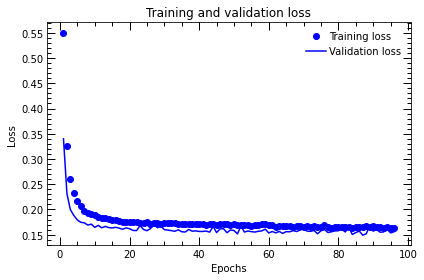

In [42]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

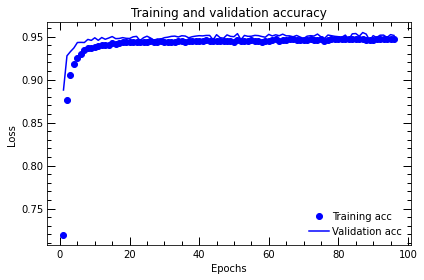

In [43]:
plt.clf()   # clear figure

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_accuracy, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()